In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import variance_threshold
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
df = pd.read_csv(r"C:\Users\Rajesh\OneDrive\Documents\finalpreprocessed2.csv")
print(df.shape)

(1025681, 9)


In [3]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of Malicious: {}".format(df[df.Label == 1].shape[0]))
print("Number of Normal: {}".format(df[df.Label == 0].shape[0]))
print("****************************************************")
print(df.shape)
X = df.drop(labels =['Label','State','Proto'],axis =1)
y = df['Label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state = 0, stratify =y)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2,random_state = 0, stratify =y_train)
X_train,X_test,y_train,y_test = train_test_split(X_test,y_test,test_size=0.5,random_state = 0, stratify =y_test)
print(X_train.shape)
print(y_test.shape)
print("****************************************************")
cont=0
for i in y_train:
    if i ==1:
        cont+=1
print(cont)

cont=0
for i in y_test:
    if i ==1:
        cont+=1
print(cont)
print("****************************************************")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

X = X_train
y=y_train 

Total number of labels: 1025681
Number of Malicious: 26885
Number of Normal: 998796
****************************************************
(1025681, 9)
(51284, 6)
(51284,)
****************************************************
1344
1344
****************************************************


In [5]:
cnt=0
for i in X_train:
    cnt+=1
    if cnt>3:
        break
    else:
        print(i)

[-0.44794572  0.99722599  0.37322577 -0.01648494 -0.01125574 -0.03221697]
[-0.44794588  0.83360196  0.37322577 -0.01648494 -0.01126486 -0.03245228]
[ 2.11061206 -1.40242158  0.37322577  0.00610953 -0.00968153 -0.0092446 ]


In [6]:
from sklearn.feature_selection import VarianceThreshold 
filter = VarianceThreshold(0.01) 
X_train = filter.fit_transform(X_train) 
X_test = filter.transform(X_test) 
X_train.shape, X_test.shape 

((51284, 6), (51284, 6))

In [7]:
#as y is a series so y_train and y_test are also series therefore we need to convert them to a numpy array.
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy()

In [8]:
X_train.shape

(51284, 6)

In [9]:
y_test.shape

(51284,)

In [12]:
#Building The SVM Model
#svc=SVC(kernel='poly') #Default hyperparameters
#svc.fit(X_train,y_train) 
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')

In [13]:
C_range=list(range(1,20))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)
#scores = cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy') #cv is cross validation
#print(scores)

[0.9921742226820285, 0.9922043250300117, 0.9922344273779948, 0.9922344273779948, 0.992264529725978, 0.9922946320739612, 0.9922946320739612, 0.9922043431421346, 0.9922043431421346, 0.9922043431421346, 0.9922043431421346, 0.9922043431421346, 0.9922043431421346, 0.9922043431421346, 0.9922043431421346, 0.9922043431421346, 0.9922043431421346, 0.9922043431421346, 0.9922344454901177]


Text(0, 0.5, 'Cross-Validated Accuracy')

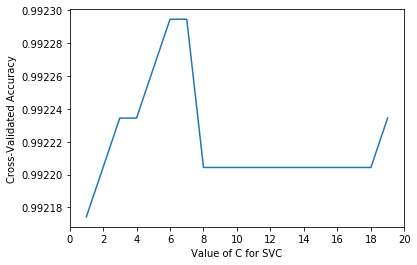

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,20))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,21,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [17]:
C_range=list(np.arange(5.9,7,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.9922946320739612, 0.9922946320739612, 0.9922946320739612, 0.9922946320739612, 0.9922946320739612, 0.9922946320739612, 0.9922946320739612, 0.9922946320739612, 0.9922946320739612, 0.9922946320739612, 0.9922946320739612]


Text(0, 0.5, 'Cross-Validated Accuracy')

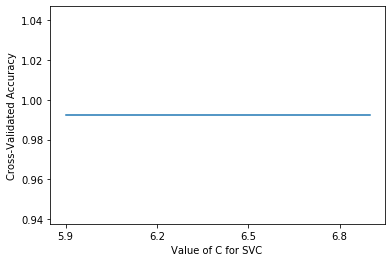

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(5.9,7,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(5.9,7,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [22]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,50,100,120,150]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.9740549275478866, 0.9740549275478866, 0.9910304783556511, 0.9919936448183752, 0.9923247163098216, 0.9929567569447313, 0.997140639184056, 0.9975921200674351, 0.9976222043032955, 0.9976222224154181]


Text(0, 0.5, 'Cross-Validated Accuracy')

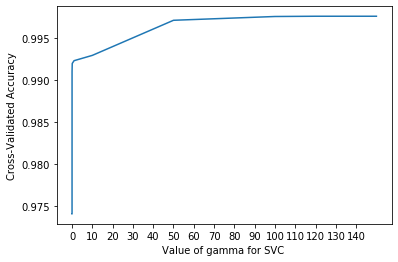

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,50,100,120,150]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,150,10))
plt.ylabel('Cross-Validated Accuracy') 

In [26]:
gamma_range=[100,120,150]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9975921200674351, 0.9976222043032955, 0.9976222224154181]


Text(0, 0.5, 'Cross-Validated Accuracy')

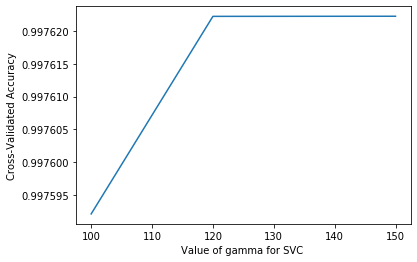

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[100,120,150]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [13]:
gamma_range=[150,160,170,180]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

[0.9976222224154181, 0.9976222224154181, 0.9976523247634013, 0.9976824271113844]


In [16]:
gamma_range=[200,210]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

[0.9977727160432112, 0.9977727160432112]


## By above evaluation and parameter analysis we selected gamma= 200 for the best performance.

In [17]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=200)

In [19]:
svc.fit(X_train,y_train)

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9938605994944023


In [21]:
#Let's check various metrics using sklearns inbuitl function to compare the values our custom functions generated
from sklearn import metrics
print(f"Actual accuracy_score : {metrics.accuracy_score(y_test,y_predict.round()): .4f}")
print(f"Actual recall_score : {metrics.recall_score(y_test,y_predict.round()): .4f}")
print(f"Actual precision_score : {metrics.precision_score(y_test,y_predict.round()): .4f}")
print(f"Actual f1_score : {metrics.f1_score(y_test,y_predict.round()): .4f}")

Actual accuracy_score :  0.9939
Actual recall_score :  0.8565
Actual precision_score :  0.9024
Actual f1_score :  0.8789


In [13]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear',C=200)
scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
print(scores)

[0.99099099 0.99399399 0.99097744 0.98795181 0.99698795 0.99246988
 0.99548193 0.99548193 0.99698795 0.99548193]


In [14]:
svc.fit(X_test,y_test)

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9921780986762936


In [16]:
#Let's check various metrics using sklearns inbuitl function to compare the values our custom functions generated
from sklearn import metrics
print(f"Actual accuracy_score : {metrics.accuracy_score(y_test,y_pred.round()): .4f}")
print(f"Actual recall_score : {metrics.recall_score(y_test,y_pred.round()): .4f}")
print(f"Actual precision_score : {metrics.precision_score(y_test,y_pred.round()): .4f}")
print(f"Actual f1_score : {metrics.f1_score(y_test,y_pred.round()): .4f}")

Actual accuracy_score :  0.9922
Actual recall_score :  0.7674
Actual precision_score :  0.9167
Actual f1_score :  0.8354


In [18]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear',C=200)
scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
print(scores) 

[0.99099099 0.99399399 0.99097744 0.98795181 0.99698795 0.99246988
 0.99548193 0.99548193 0.99698795 0.99548193]


In [18]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear',C=.1)
scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
print(scores) 

[0.9921781  0.99338147 0.99397953 0.99337748 0.99127032 0.99307646
 0.99006623 0.99307646 0.9897652  0.98916315]


In [13]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=200,C=200)
svc.fit(X_train,y_train) 

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=200, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
y_pred=svc.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9969915764139591

In [15]:
#Let's check various metrics using sklearns inbuitl function to compare the values our custom functions generated
from sklearn import metrics
print(f"Actual accuracy_score : {metrics.accuracy_score(y_test,y_pred.round()): .4f}")
print(f"Actual recall_score : {metrics.recall_score(y_test,y_pred.round()): .4f}")
print(f"Actual precision_score : {metrics.precision_score(y_test,y_pred.round()): .4f}")
print(f"Actual f1_score : {metrics.f1_score(y_test,y_pred.round()): .4f}")

Actual accuracy_score :  0.9970
Actual recall_score :  0.9302
Actual precision_score :  0.9524
Actual f1_score :  0.9412


In [16]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear',gamma=200,C=200)
scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.99099099 0.99399399 0.99097744 0.98795181 0.99698795 0.99246988
 0.99548193 0.99548193 0.99698795 0.99548193]
0.9936805802087983


In [17]:
svc.fit(X_train,y_train)

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=200, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
from sklearn import metrics
y_pred=svc.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9939831528279182

In [19]:
#Let's check various metrics using sklearns inbuitl function to compare the values our custom functions generated
from sklearn import metrics
print(f"Actual accuracy_score : {metrics.accuracy_score(y_test,y_pred.round()): .4f}")
print(f"Actual recall_score : {metrics.recall_score(y_test,y_pred.round()): .4f}")
print(f"Actual precision_score : {metrics.precision_score(y_test,y_pred.round()): .4f}")
print(f"Actual f1_score : {metrics.f1_score(y_test,y_pred.round()): .4f}")

Actual accuracy_score :  0.9940
Actual recall_score :  0.8605
Actual precision_score :  0.9024
Actual f1_score :  0.8810


## This is the best performance by setting these parameters ( Kernel = rbf, gamma = 200, C = 200 )

In [6]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=200,C=200)
svc.fit(X_train,y_train)

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=200, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.9990900345786861

In [11]:
#Let's check various metrics using sklearns inbuitl function to compare the values our custom functions generated
from sklearn import metrics
print(f"Actual accuracy_score : {metrics.accuracy_score(y_test,y_predict.round()): .4f}")
print(f"Actual recall_score : {metrics.recall_score(y_test,y_predict.round()): .4f}")
print(f"Actual precision_score : {metrics.precision_score(y_test,y_predict.round()): .4f}")
print(f"Actual f1_score : {metrics.f1_score(y_test,y_predict.round()): .4f}")

Actual accuracy_score :  0.9991
Actual recall_score :  0.9784
Actual precision_score :  0.9867
Actual f1_score :  0.9826


In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_predict.round()))
print(classification_report(y_test.round(),y_predict.round()))

[[149766     53]
 [    87   3946]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149819
           1       0.99      0.98      0.98      4033

    accuracy                           1.00    153852
   macro avg       0.99      0.99      0.99    153852
weighted avg       1.00      1.00      1.00    153852



In [13]:
TP = true_positives = 3946
TN = true_negatives = 149766
FP = false_positives = 53
FN = false_negatives = 87

In [1]:
TP = true_positives = 3946
TN = true_negatives = 149766
FP = false_positives = 53
FN = false_negatives = 87

In [14]:
#False Positive rate
FPR = FP/(TN+FP)
print("The flase positive rate of this model is{:.4f}".format(FPR))

The flase positive rate of this model is0.0004


In [15]:
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
y_pred = y_predict.round()
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 


print("The model used is Deep Learning classifier")
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {:.6f}".format(acc)) 

prec = precision_score(y_test, y_pred) 
print("The precision is {:.6f}".format(prec)) 

rec = recall_score(y_test, y_pred) 
print("The recall is {:.6f}".format(rec)) 

f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {:.6f}".format(f1)) 

MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is{:.6f}".format(MCC)) 

The model used is Deep Learning classifier
The accuracy is 0.999090
The precision is 0.986747
The recall is 0.978428
The F1-Score is 0.982570
The Matthews correlation coefficient is0.982112
